## Statistical Coverage Product viewer

This notebook makes timeseries plots of Peter May's Statistical Coverage Product as generated by derive_scp.py

In [88]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates
import numpy as np
%matplotlib inline

Input data path

In [93]:
scp_netcdf_file_path = '/home/rjackson/data/SCPJan28.cdf'

Load netCDF variables

In [95]:
scp_netcdf = Dataset(scp_netcdf_file_path, mode='r')

years = scp_netcdf.variables['years'][:]
months = scp_netcdf.variables['months'][:]
days = scp_netcdf.variables['days'][:]
hours = scp_netcdf.variables['hours'][:]
minutes = scp_netcdf.variables['minutes'][:]
SCP0 = scp_netcdf.variables['SCP0'][:,:]
SCP10 = scp_netcdf.variables['SCP10'][:,:]
SCP20 = scp_netcdf.variables['SCP20'][:,:]
SCP30 = scp_netcdf.variables['SCP30'][:,:]
SCP40 = scp_netcdf.variables['SCP40'][:,:]
levels = scp_netcdf.variables['levels'][:]
scp_netcdf.close()

Display statistical coverage product

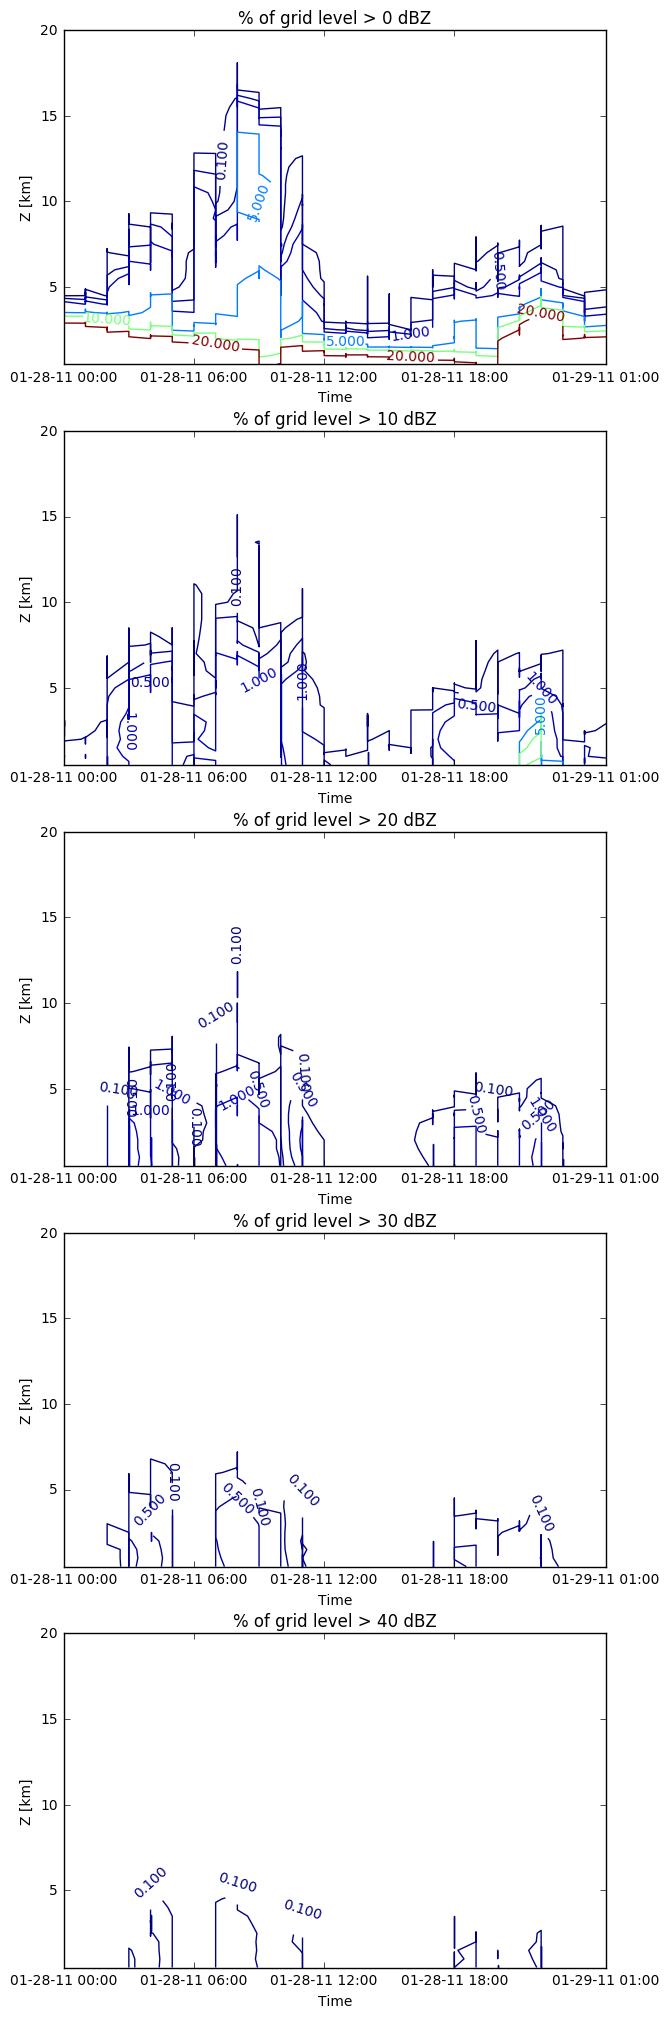

In [96]:
# Convert times to numerical format
datenums = []
for i in range(0,len(years)):
    temp_date = datetime(year=years[i],
                         month=months[i],
                         day=days[i],
                         hour=hours[i],
                         minute=minutes[i],
                         )
    datenums.append(dates.date2num(temp_date))   

num_dates = len(datenums)
datelocs = []
for i in range(0, num_dates, int(num_dates/4)):
    temp_date = datetime(year=years[i],
                         month=months[i],
                         day=days[i],
                         hour=hours[i],
                         minute=minutes[i],
                         )
    datelocs.append(temp_date)
x = dates.date2num(datelocs)    

# Create meshgrid for contour plot
times, lvls = np.meshgrid(datenums,levels)

contour_levels = [0.1, 0.5, 1, 5, 10,20]
# Plot contour figure
plt.figure(figsize=(7,25))
plt.subplot(511)
CS = plt.contour(times,lvls,np.transpose(SCP0), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 0 dBZ')

plt.subplot(512)
CS = plt.contour(times,lvls,np.transpose(SCP10), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 10 dBZ')

plt.subplot(513)
CS = plt.contour(times,lvls,np.transpose(SCP20), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 20 dBZ')

plt.subplot(514)
CS = plt.contour(times,lvls,np.transpose(SCP30), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 30 dBZ')

plt.subplot(515)
CS = plt.contour(times,lvls,np.transpose(SCP40), levels=contour_levels)
plt.gca().set_xticks(x)
plt.clabel(CS, inline=1, fontsize=10)
# Set the xtick labels to correspond to just the dates you entered.
plt.gca().set_xticklabels([date.strftime("%m-%d-%y %H:%M") for date in datelocs])

plt.ylabel('Z [km]')
plt.xlabel('Time')
plt.title('% of grid level > 40 dBZ')